In [1]:
import numpy as np

In [2]:
import matplotlib.pyplot as plt

(1482, 1982, 3)
(256, 256, 3)


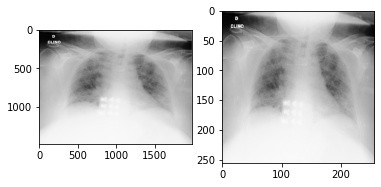

In [3]:
import cv2
image_1 = cv2.imread('/content/drive/MyDrive/Datasets/covid, normal, neumonia/train/train/COVID19/COVID19(1).jpg')
# original image

plt.subplot(1,2,1)
plt.imshow(image_1[:,:,::-1])


print(image_1.shape)

# resizing the image 

image_resize = cv2.resize(image_1 , ((256,256)))

print(image_resize.shape)
plt.subplot(1,2,2)
plt.imshow(image_resize[:,:,::-1])

In [4]:
# setting same size of an image 

img_height, img_width = [256,256]


In [5]:
# finding the data:

path = '/content/drive/MyDrive/Datasets/covid, normal, neumonia'

In [6]:
# finding training data path and test data path 

train_data_path = '/content/drive/MyDrive/Datasets/covid, normal, neumonia/train/train'
test_data_path = '/content/drive/MyDrive/Datasets/covid, normal, neumonia/test/test'

In [7]:
import tensorflow
print(tensorflow.__version__)

2.11.0


In [8]:
from tensorflow import keras 
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [9]:
# Data_preprocessing on the image using tensorflow image data generator module 


# follow = https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image/ImageDataGenerator


training_prepross = ImageDataGenerator(rescale = 1./255,
                                       shear_range = 0.2,
                                       zoom_range = 0.2,
                                       horizontal_flip = True,
                                       vertical_flip = True)

# training is done with rescale pixel so testing should be also same:

# irrepective of that nothinh should be added for test:

testing_process = ImageDataGenerator(rescale = 1./255)



In [10]:
# Finding the label folders:
# using glob we can find the number of label folders in trainin_dataset_folder:

import glob 
from glob import glob

glob('/content/drive/MyDrive/Datasets/covid, normal, neumonia/test/test/*')


['/content/drive/MyDrive/Datasets/covid, normal, neumonia/test/test/COVID19',
 '/content/drive/MyDrive/Datasets/covid, normal, neumonia/test/test/NORMAL',
 '/content/drive/MyDrive/Datasets/covid, normal, neumonia/test/test/PNEUMONIA']

In [11]:
glob('/content/drive/MyDrive/Datasets/covid, normal, neumonia/train/train/*')

['/content/drive/MyDrive/Datasets/covid, normal, neumonia/train/train/COVID19',
 '/content/drive/MyDrive/Datasets/covid, normal, neumonia/train/train/PNEUMONIA',
 '/content/drive/MyDrive/Datasets/covid, normal, neumonia/train/train/NORMAL']

In [12]:
target = ['COVID19','NORMAL','PNEUMONIA']

In [13]:
## collecting each image from training labels folder and test labels folder:

train_data = training_prepross.flow_from_directory(train_data_path , 
                                                   target_size = (img_height,img_width),
                                                   classes = target , 
                                                   class_mode = 'categorical',
                                                   batch_size = 10)



test_data = testing_process.flow_from_directory(test_data_path , 
                                                   target_size = (img_height,img_width),
                                                   classes = target , 
                                                   class_mode = 'categorical',
                                                   batch_size = 10)


Found 5159 images belonging to 3 classes.
Found 1288 images belonging to 3 classes.


In [14]:
# Now its time for Building an CNN Model architecture:

# Importing required Packages:

from tensorflow.keras.models import Sequential # beginnnig  of CNN 
from tensorflow.keras.layers import Conv2D , MaxPool2D ,Flatten,Activation , Dense
from tensorflow.keras.activations import relu,sigmoid,softmax
from tensorflow.keras.optimizers import Adam


In [15]:
# Build CNN Architecture:

model = Sequential()

# First hidden layer in CNN
model.add(Conv2D(128 , kernel_size = (3,3),padding='same',activation='relu',input_shape = (img_height,img_width,3)))
model.add(MaxPool2D(pool_size = (2,2)))

# second hidden layer in CNN 
model.add(Conv2D(64 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Third hidden layer in CNN 
model.add(Conv2D(32 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Fourth hidden layer in CNN 
model.add(Conv2D(16 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Fifth hidden layer in CNN 
model.add(Conv2D(8 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))


# Sixth hidden layer in CNN 
model.add(Conv2D(4 , kernel_size = (3,3),padding='same',activation='relu'))
model.add(MaxPool2D(pool_size = (2,2)))

model.add(Flatten())  # converting into 1-d and giving 1-d to ANN 

model.add(Dense(32 , activation = 'relu')) # first hidden layer in ANN
model.add(Dense(16 , activation = 'relu'))  # second hidden layer in ANN
model.add(Dense(8 , activation = 'relu'))  # Third Hidden layer in ANN 

model.add(Dense(3 , activation = 'softmax')) # since its is a binary classfication using sigmoid as an output actiavtion function:



In [16]:
model.summary() 

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 128)     3584      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 128)    0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 64)      73792     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 32)        18464     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 32, 32, 32)       0

In [17]:
model.compile(optimizer='adam' , loss = 'categorical_crossentropy' , metrics = ['Accuracy'])



In [18]:
model.fit(train_data , epochs = 10)

Epoch 1/10
516/516 [==============================] - 3107s 6s/step - loss: 0.8236 - Accuracy: 0.6699
Epoch 2/10
516/516 [==============================] - 202s 391ms/step - loss: 0.6146 - Accuracy: 0.7563
Epoch 3/10
516/516 [==============================] - 202s 391ms/step - loss: 0.4282 - Accuracy: 0.8490
Epoch 4/10
516/516 [==============================] - 203s 394ms/step - loss: 0.3888 - Accuracy: 0.8614
Epoch 5/10
516/516 [==============================] - 203s 393ms/step - loss: 0.3591 - Accuracy: 0.8637
Epoch 6/10
516/516 [==============================] - 203s 394ms/step - loss: 0.3192 - Accuracy: 0.8794
Epoch 7/10
516/516 [==============================] - 203s 393ms/step - loss: 0.3082 - Accuracy: 0.8841
Epoch 8/10
516/516 [==============================] - 203s 392ms/step - loss: 0.3107 - Accuracy: 0.8841
Epoch 9/10
516/516 [==============================] - 200s 387ms/step - loss: 0.2992 - Accuracy: 0.8936
Epoch 10/10
516/516 [==============================] - 199s 385ms/

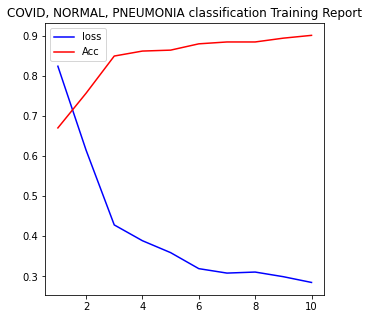

In [26]:
plt.figure(figsize = (5,5))
plt.title('COVID, NORMAL, PNEUMONIA classification Training Report')
plt.plot(np.arange(1,11) , training_loss , color = 'b',label = 'loss')
plt.plot(np.arange(1,11) , training_acc , color = 'r',label = 'Acc')
plt.legend(loc = 0)
plt.show()

In [29]:
d = model.predict(test_data)

129/129 [==============================] - 299s 2s/step


In [30]:
# creating validation report:
test_data.classes

array([0, 0, 0, ..., 2, 2, 2], dtype=int32)

In [31]:
d

array([[1.9816358e-02, 9.0533970e-03, 9.7113031e-01],
       [6.8478868e-03, 2.3379168e-03, 9.9081427e-01],
       [1.1127362e-02, 1.4382157e-01, 8.4505105e-01],
       ...,
       [1.9086708e-01, 1.0209305e-02, 7.9892367e-01],
       [5.5433734e-04, 1.9239660e-02, 9.8020601e-01],
       [7.3805533e-04, 7.3834831e-01, 2.6091364e-01]], dtype=float32)

In [32]:
a = np.array([[1,3,4]])
np.argmax(a , axis = 1)


array([2])

In [33]:
predicted_points = np.argmax(d , axis = 1)

In [34]:
predicted_points

array([2, 2, 2, ..., 2, 2, 1])

In [35]:
from sklearn.metrics import accuracy_score , classification_report , confusion_matrix

In [36]:
accuracy_score(test_data.classes , predicted_points)

0.5108695652173914

In [37]:
confusion_matrix(test_data.classes , predicted_points)

array([[ 13,  33,  70],
       [ 19, 104, 194],
       [ 60, 254, 541]])

In [38]:
print(classification_report(test_data.classes , predicted_points))

              precision    recall  f1-score   support

           0       0.14      0.11      0.12       116
           1       0.27      0.33      0.29       317
           2       0.67      0.63      0.65       855

    accuracy                           0.51      1288
   macro avg       0.36      0.36      0.36      1288
weighted avg       0.52      0.51      0.52      1288



In [39]:
import cv2

In [43]:
# create a function to take the image from its path 

def prediction(path):
  # load the image 
  image = plt.imread(path)
#  print(image)
  print(image.shape)
  # since training has be done with 150 , 150 so we need to resize the image into 150,150
  image = cv2.resize(image , (256,256))
  print(image.shape)
  # since the training was done with pixel values after scaling down to 0 - 1 so for test also we need to scale down into 0 - 1
  image = np.array(image) / 255.0
 # print(image)
  # Now we need to make sure convert data into Deep learning CNN trained Manner 
  image = np.expand_dims(image , axis = 0)
  print(image.shape)
  # print(image)
  # Now give the data to trained model
  result = model.predict(image)
  print(result)
  sol = np.argmax(result , axis = 1)
  print(sol[0])
  print(target[sol[0]])
  img = plt.imread(path)
  plt.imshow(img)

(1611, 1677, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 34ms/step
[[0.47206563 0.28480414 0.24313022]]
0
COVID19


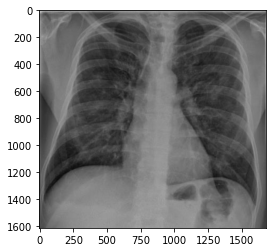

In [44]:
prediction('/content/drive/MyDrive/Datasets/covid, normal, neumonia/test/test/COVID19/10.jpg')

(1878, 1692, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 23ms/step
[[0.00295404 0.97625536 0.02079057]]
1
NORMAL


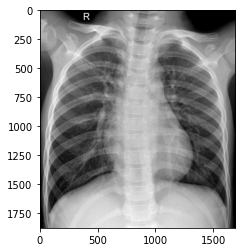

In [45]:
prediction('/content/drive/MyDrive/Datasets/covid, normal, neumonia/test/test/NORMAL/1.jpg')

(1058, 1295, 3)
(256, 256, 3)
(1, 256, 256, 3)
1/1 [==============================] - 0s 80ms/step
[[0.00143121 0.6625226  0.3360462 ]]
1
NORMAL


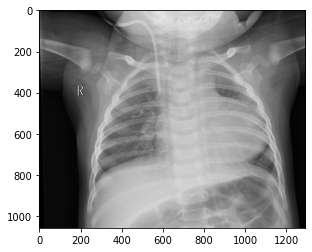

In [46]:
prediction('/content/drive/MyDrive/Datasets/covid, normal, neumonia/test/test/PNEUMONIA/1.jpg')